# Math 521 HW1

## Computing Question 3

<img src="Q3.png">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from  imageio import imread

In [3]:
image = imread('cameraman.png')

In [4]:
image.shape

(256, 256)

#### Original Image

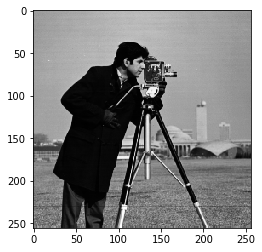

In [177]:
plt.imshow(image,cmap='gray')

##### Defining a function to scale back sx and sy

In [150]:
def process_alpha(alpha):
    if alpha[0]>1:
        alpha[0]=1/alpha[0]
    if alpha[1]>1:
        alpha[1]=1/alpha[1]
    return alpha

##### Main function that enlarges and shrinks image

In [178]:
def enlarge_shrink(image,P,alpha):
    B=np.zeros((image.shape[0],image.shape[1]))
    sx=alpha[0];sy=alpha[1];
    alpha=process_alpha(alpha)
    for i in range(image.shape[0]):
        for j in range(image.shape[0]):
            ind=alpha*(np.array([i,j,1]) - P)+P
            ind=ind.astype('int')
            if sx>=1 and sy>=1:
                B[(i,j)]=image[(ind[0],ind[1])]
            elif sx<=1 and sy<=1:
                B[(ind[0],ind[1])]=image[i,j]
            elif sx>=1 and sy<=1:
                B[(i,ind[1])]=image[ind[0],j]
            elif sx<=1 and sy>=1:
                B[(ind[0],j)]=image[i,ind[1]]
    return B

#### User input: Define reference point P on the image

In [157]:
tx=image.shape[0]/2
ty=image.shape[1]/2
P=np.array([tx,ty,1])
P

array([128., 128.,   1.])

#### Try different enlargement and shrinking alpha values

.....Image zoom in and zoom out at the center of the image (P)....
alpha =  [1. 1. 1.]


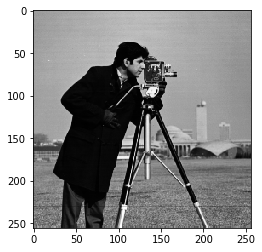

alpha =  [1.  0.5 1. ]


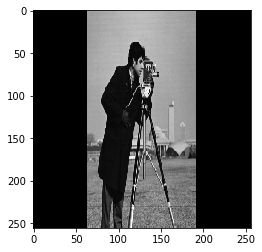

alpha =  [1. 2. 1.]


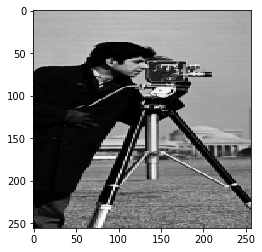

alpha =  [0.5 1.  1. ]


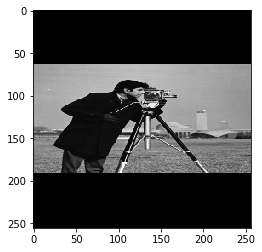

alpha =  [0.5 0.5 1. ]


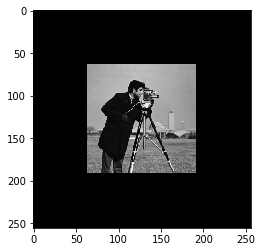

alpha =  [0.5 2.  1. ]


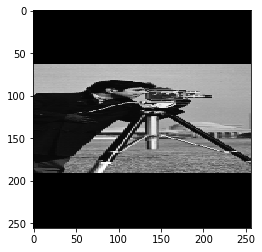

alpha =  [2. 1. 1.]


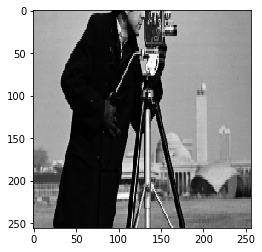

alpha =  [2.  0.5 1. ]


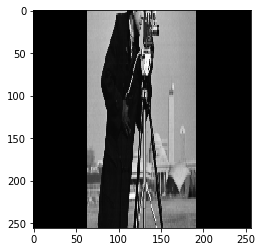

alpha =  [2. 2. 1.]


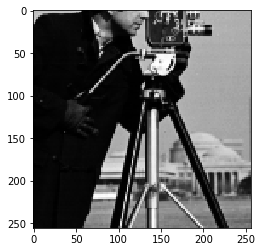

In [179]:
print(".....Image zoom in and zoom out at the center of the image (P)....")
for sx in [1.0,0.5,2.0]:
    for sy in [1.0,0.5,2.0]:
        alpha=np.array([sx,sy,1])
        print("alpha = ",alpha)
        plt.imshow(enlarge_shrink(image,P,alpha),cmap='gray')
        plt.show()